### Introduction
Here I will explore the data presented by "UCI Machine Learning" for mushroom classification. The goal of this dataset is to classify between edible (e) to poisonous (p) mushrooms. First, I will analyze the data, by showing it's characteristics, and then I will classify it to achieve maximum accuracy and precision.

### 1. Importing libraries
Numpy will be used for linear algebra and fixing arrays, Pandas for data processing, Seaborn for cool visualizations, matplotlib for figures, graphviz for awesome graph visualization and Scikit-Learn for preprocessing and machine learning algorithms.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

### 2. Loading the data and initial exploration

In [2]:
df = pd.read_csv('mushrooms.csv')
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [3]:
df.head(3)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  

[3 rows x 23 columns]

The data is categorial so I convert it with LabelEncoder to transfer to ordinal

In [4]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               8124.000000             8124.000000   
mean   ...                  1.603644                5.816347   
std    ...                  0.675974                1.901747   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             8124.000000     8124.0  8124.000000  8124.000000   
mean                 5.794682        0.0     1.965534     1.069424   
std                  1.907291        0.0     0.242669     0.271064   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  8124.000000        8124.000000  8124.000000  8124.000000  
mean      2.291974           3.596750     3.644018     1.508616  
std       1.801672           2.382663     1.252082     1.719975  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 23 columns]

From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [5]:
df=df.drop(["veil-type"],axis=1)

### 3. Quick look at the characteristics of the data
The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

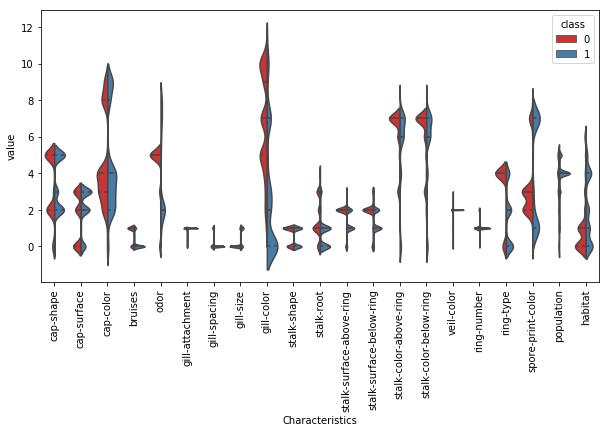

In [6]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

#### Is the data balanced?

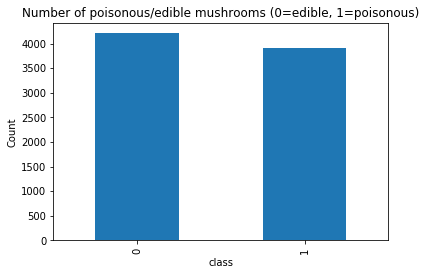

In [7]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

The dataset is balanced :D

Let's look at the correlation between the variables:

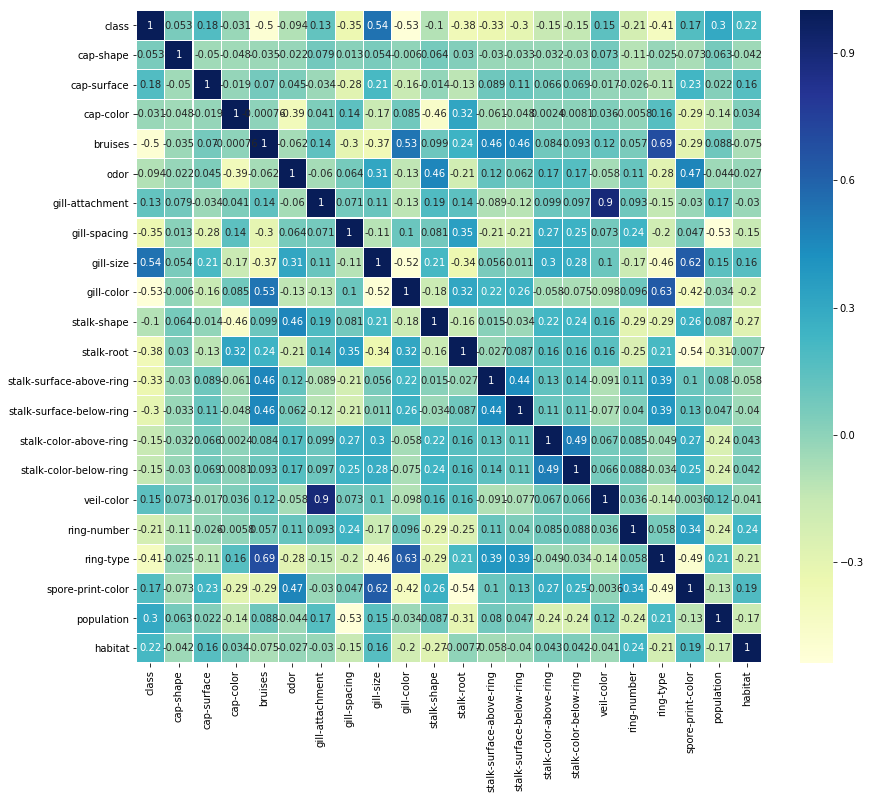

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Usually the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely:

In [9]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

gill-color     class
0            0  1.000000
8            8  1.000000
3            3  0.721311
2            2  0.670213
7            7  0.428954
11          11  0.255814
10          10  0.204659
4            4  0.156863
5            5  0.106870
9            9  0.097561
1            1  0.000000
6            6  0.000000

Lets look closely at the feature "gill-color" :

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


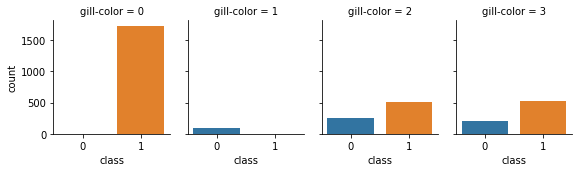

In [10]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


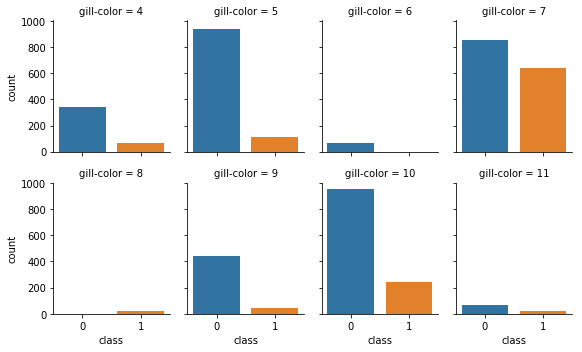

In [11]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

### 4. Model, predict and estimate the result:

In [12]:
X=df.drop(['class'], axis=1)
Y=df['class']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

For the mushroom classification dataset, I chose to use decision tree classifier. I will use the default settings of the classifier and explain shortly how it works.

### 4.1 Decision tree classifier
Classification tree predict a qualative response, in contrast to regression tree that predict quantitive response. Classification tree predicts the observation that belong to the most common occurring class from the training data for each region. In order to grow the classification tree the algorithm uses recursive binary splitting.

The Gini index

The Gini index is a measure of inequality of a system that has values between 0 to 1 (while 0 is perfect equality and 1 is absolute inequality). In other words the Gini index is a measure that define the node purity (value of 0 is pure and value of 1 is not pure).

The Gini index is defined by: 





while J is the classes, pi is the fraction of items labeled with class i in the set.

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

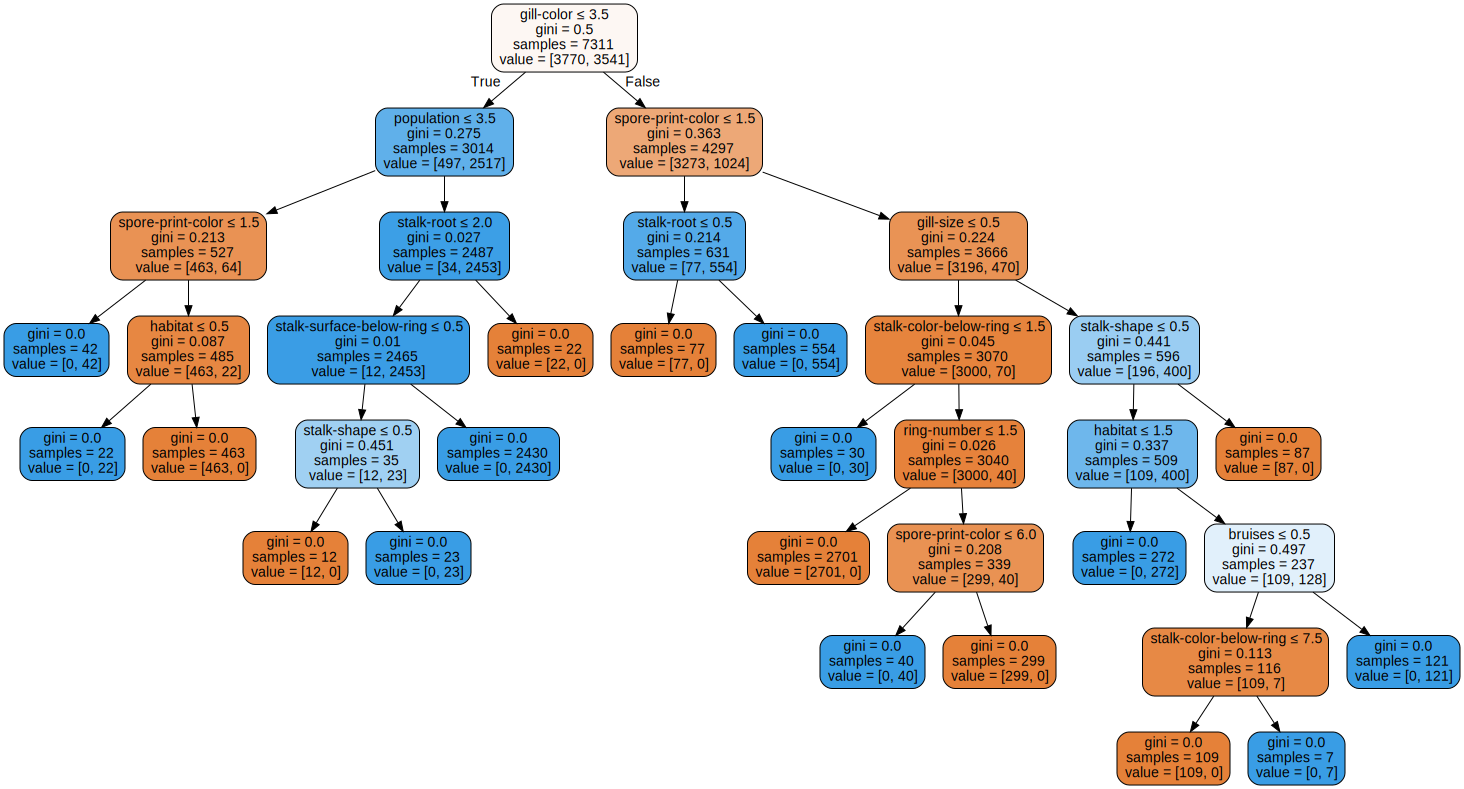

In [14]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 5. Feature importances
By all methods examined before the feature that is most important is "gill-color".

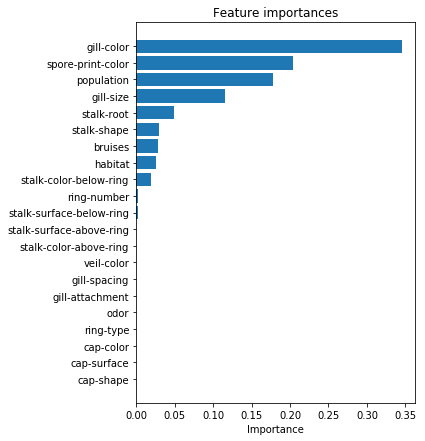

In [15]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [16]:
y_pred=clf.predict(X_test)
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       375

   micro avg       1.00      1.00      1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



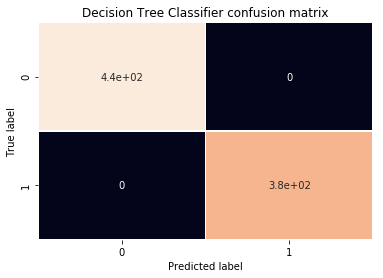

In [17]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Decision Tree Classifier resulted 100% accuracy and precision!! That's clearly overfitting! :...(

In the code below 10-fold cross validation is performed for different depths of the tree and the accuracy is computed. The accuracy on the test set seems to plateau when the depth is 10.

Lets see at which tree depth the model begins to overfit:

In [13]:
#code edited but taken from: https://www.r-bloggers.com/practical-machine-learning-with-r-and-python-part-5/
def computeCVAccuracy(X,Y,folds):
    accuracy=[]
    foldAcc=[]
    depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    for i in depth: 
        kf = KFold(len(X),n_folds=folds)
        for train_index, test_index in kf:
            X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)
            clf = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
            score=clf.score(X_test, Y_test)
            accuracy.append(score)     
        foldAcc.append(np.mean(accuracy))  
    return(foldAcc)

    
cvAccuracy=computeCVAccuracy(X,Y,folds=10)

df1=pd.DataFrame(cvAccuracy)
df1.columns=['10-fold cv Accuracy']
df=df1.reindex(range(1,20))
df.plot()
plt.title("Decision Tree - 10-fold Cross Validation Accuracy vs Depth of tree")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.ylim([0.8,1])
plt.xlim([0,20])

NameError: name 'X' is not defined

### 6. Gaussian Naive Bayes (GaussianNB)

In [15]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred_GNB=clf_GNB.predict(X_test)

cfm=confusion_matrix(Y_test, y_pred_GNB)

In [ ]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(Y_test, y_pred_GNB))

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_GNB)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

In [ ]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, y_pred_GNB, "Gaussian Naive Bayes")

In [24]:
print(sklearn.__version__)

NameError: name 'sklearn' is not defined